In [1]:
import os
import pickle
import numpy as np
import matplotlib.pyplot as plt

In [2]:
with open('points.pkl', 'rb') as f:
    y_pred, y_true = pickle.load(f)

In [1]:
os.chdir('../../../')
from train import confusionmat

/home/g/Desktop/VAE/src/reports/test2


ModuleNotFoundError: No module named 'train'

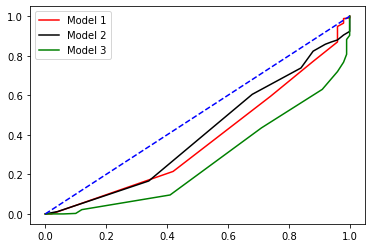

In [26]:
bins = 50

names = ['06','07','08']
colours = ['r', 'k', 'g']

for m, c in zip(names, colours):
    y_p, y_t = y_pred[m], y_true[m]
    y_p, y_t = np.expand_dims(y_p,-1), np.expand_dims(y_t,-1)
    tprs = []
    fprs = []
    for b in range(bins+1):
        cm = confusionmat(y_p, y_t, conf = b/50)
        tpr = cm[1,1]/(cm[1,1] + cm[0,1])
        fpr = cm[1,0]/(cm[0,0] + cm[1,0])
        tprs.append(tpr)
        fprs.append(fpr)
    plt.plot(tprs, fprs, color = c, label = f'Model {int(m) - 5}')
plt.plot([0,1],[0,1], 'b--')
plt.legend()